# conf-6 of the NHRF data pipeline
In this notebook we analyze the results from run1, 2, 3, 4 of the `conf-6` configuration of the NHRF data pipeline

Had to rerun runNr 2, 3 due to overlapping data (needed more room between power surges to isolate events)

In [1]:
import pandas as pd
import numpy as np
from analysis_functions import get_time_periods, get_power_data, divide_power_data_into_step_periods
from analysis_functions import plot_energy_usage, plot_multiple_datasets, plot_energy_usage_overlay_multiple_datasets

In [ ]:
corresponding_datasets = [
    ("./data_carbontracker/conf-6/run1.dat", './data_tapo-p115-sct-sd/Power-2025-08-25_26.xls', '2025-08-26 01:00:00', '2025-08-26 08:00:00'),
    ("./data_carbontracker/conf-6/run2.dat", './data_tapo-p115-sct-sd/Power-2025-08-26_27.xls', '2025-08-26 14:00:00', '2025-08-26 16:40:00'),
    ("./data_carbontracker/conf-6/run3.dat", './data_tapo-p115-sct-sd/Power-2025-08-26_27.xls', '2025-08-27 00:00:00', ),
    ("./data_carbontracker/conf-6/run4.dat", './data_tapo-p115-sct-sd/Power-2025-08-26_27-2.xls', ),
]
# corresponding datasets tuples contain the following information: (carbontracker_data, tapo_data, start_time, end_time)

In [95]:
runNr = 4 # runNr = 1, 2, 3, 4 // corresponds to 0, 1, 2, 3 in the corresponding_datasets
path = corresponding_datasets[runNr -1][0]
carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)

/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_9309/1416934813.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)


In [96]:
carbontracker_simpipe_data

,step,start,stop,duration,co2,energy,status,output
0,trimming,2025-08-27T06:44:39Z,2025-08-27T07:04:07Z,1168,1.217,0.040444,Succeeded,trimming-results*
1,alignment,2025-08-27T07:04:17Z,2025-08-27T08:13:45Z,4168,6.619,0.220053,Succeeded,alignment-results*
2,mark-duplicates,2025-08-27T08:13:55Z,2025-08-27T08:36:47Z,1372,0.592,0.019666,Succeeded,mark-duplicates-results*
3,create-fasta-dict,2025-08-27T08:36:57Z,2025-08-27T08:37:50Z,53,0.004,0.000125,Succeeded,fasta-dict*
4,create-fasta-index,2025-08-27T08:38:00Z,2025-08-27T08:38:46Z,46,0.001,0.000031,Succeeded,fasta-index*
5,base-quality-score,2025-08-27T08:38:56Z,2025-08-27T08:41:07Z,131,0.005,0.000168,Succeeded,final-results*


In [119]:
dt_format = '%Y-%m-%d %H:%M:%S'
for _, row in carbontracker_simpipe_data.iterrows():
    start_time = pd.to_datetime(row['start']).strftime(dt_format)
    stop_time = pd.to_datetime(row['stop']).strftime(dt_format)
    print(f"Step: {row['step']}, Start: {start_time}, Stop: {stop_time}")

Step: trimming, Start: 2025-08-27 06:44:39, Stop: 2025-08-27 07:04:07
Step: alignment, Start: 2025-08-27 07:04:17, Stop: 2025-08-27 08:13:45
Step: mark-duplicates, Start: 2025-08-27 08:13:55, Stop: 2025-08-27 08:36:47
Step: create-fasta-dict, Start: 2025-08-27 08:36:57, Stop: 2025-08-27 08:37:50
Step: create-fasta-index, Start: 2025-08-27 08:38:00, Stop: 2025-08-27 08:38:46
Step: base-quality-score, Start: 2025-08-27 08:38:56, Stop: 2025-08-27 08:41:07


In [114]:
corresponding_datasets[runNr -1][1]

'./data_tapo-p115-sct-sd/Power-2025-08-26_27-2.xls'

In [98]:
power_data = get_power_data(data_path=corresponding_datasets[runNr -1][1])

In [99]:
power_data.describe()

,Date,Power(W),Energy(kWh)
count,288,288.000000,288.000000
mean,2025-08-26 22:42:30,233.020833,0.019418
min,2025-08-26 10:45:00,200.000000,0.016667
25%,2025-08-26 16:43:45,205.750000,0.017146
50%,2025-08-26 22:42:30,212.000000,0.017667
75%,2025-08-27 04:41:15,234.000000,0.019500
max,2025-08-27 10:40:00,463.000000,0.038583
std,NaN,46.298527,0.003858


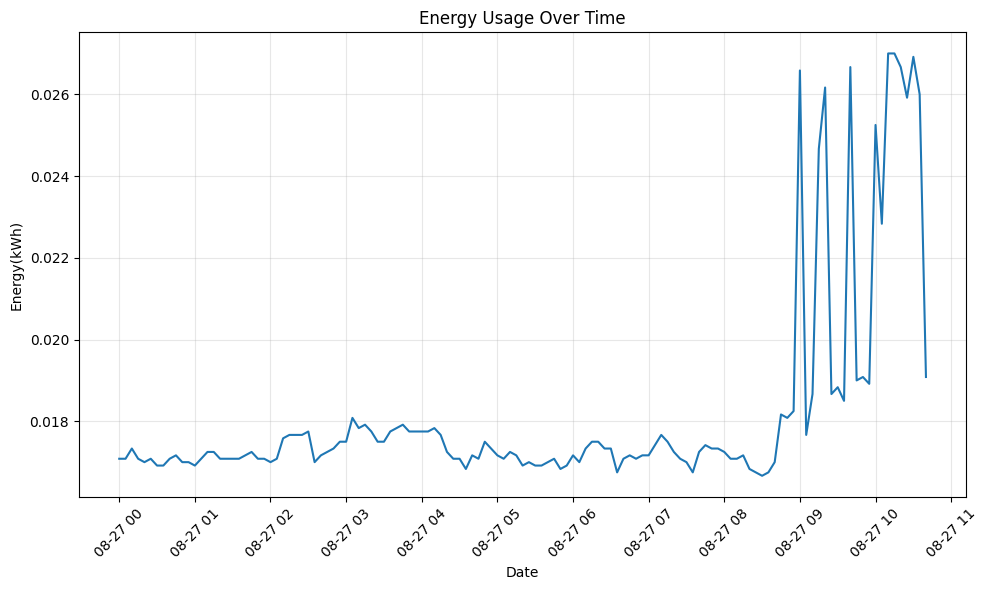

In [102]:
#raw_power_data.plot(x='Date', y='Energy(kWh)', title='Energy Usage Over Time')
#start_time = corresponding_datasets[runNr -1][2]

# run4 // 
plot_energy_usage(power_data, x_col="Date", y_col="Energy(kWh)", title="Energy Usage Over Time", start='2025-08-27 00:00:00', end='2025-08-27 15:00:00')

# run 2 // (There is nothing here! does not seem like there is a baseline and any differences during the course of the run!!!)
#plot_energy_usage(power_data, x_col="Date", y_col="Energy(kWh)", title="Energy Usage Over Time", start='2025-08-26 10:00:00', end='2025-08-26T18:53:15')
#plot_energy_usage(power_data, x_col="Date", y_col="Energy(kWh)", title="Energy Usage Over Time", start='2025-08-26 14:00:00', end='2025-08-26 18:53:00')

# run 1 // (This looks good)
#plot_energy_usage(power_data, x_col="Date", y_col="Energy(kWh)", title="Energy Usage Over Time", start='2025-08-26 01:00:00', end=None)

In [36]:
time_periods = get_time_periods(carbontracker_simpipe_data, corresponding_datasets[runNr -1][2], corresponding_datasets[runNr -1][3])

In [37]:
time_periods

[('baseline', '2025-08-26 08:40:00', '2025-08-26 18:53:00'),
 ('create-fasta-dict', '2025-08-26 16:46:10', '2025-08-26 16:47:07'),
 ('create-fasta-index', '2025-08-26 16:47:17', '2025-08-26 16:48:08'),
 ('trimming', '2025-08-26 16:48:18', '2025-08-26 17:07:47'),
 ('alignment', '2025-08-26 17:07:57', '2025-08-26 18:17:14'),
 ('mark-duplicates', '2025-08-26 18:17:24', '2025-08-26 18:40:52'),
 ('base-quality-score', '2025-08-26 18:41:02', '2025-08-26 18:43:15')]

In [9]:
power_data_segments = divide_power_data_into_step_periods(time_periods, power_data)

Processing baseline...
    start: 2025-08-26 01:00:00, end: 2025-08-26 08:00:00
Processing trimming...
    start: 2025-08-26 09:09:44, end: 2025-08-26 09:29:00
Processing create-fasta-index...
    start: 2025-08-26 09:29:10, end: 2025-08-26 09:30:06
Processing alignment...
    start: 2025-08-26 09:30:16, end: 2025-08-26 10:39:59
Processing mark-duplicates...
    start: 2025-08-26 10:40:09, end: 2025-08-26 11:04:28
Processing create-fasta-dict...
    start: 2025-08-26 11:04:38, end: 2025-08-26 11:05:32
Processing base-quality-score...
    start: 2025-08-26 11:05:42, end: 2025-08-26 11:07:52
No data found between 2025-08-26 11:05:42 and 2025-08-26 11:07:52
    Warning! No data for period: base-quality-score
Last segment detected.
    Last segment contains NO data.
    Using datapoint at 2025-08-26 11:10:00 with Power=303W, Energy=0.025249999999999998kWh, fraction=0.43333333333333335, baseline_energy=0.016725490196078434, baseline_power=200.7058823529412


In [10]:
len(power_data_segments)

7

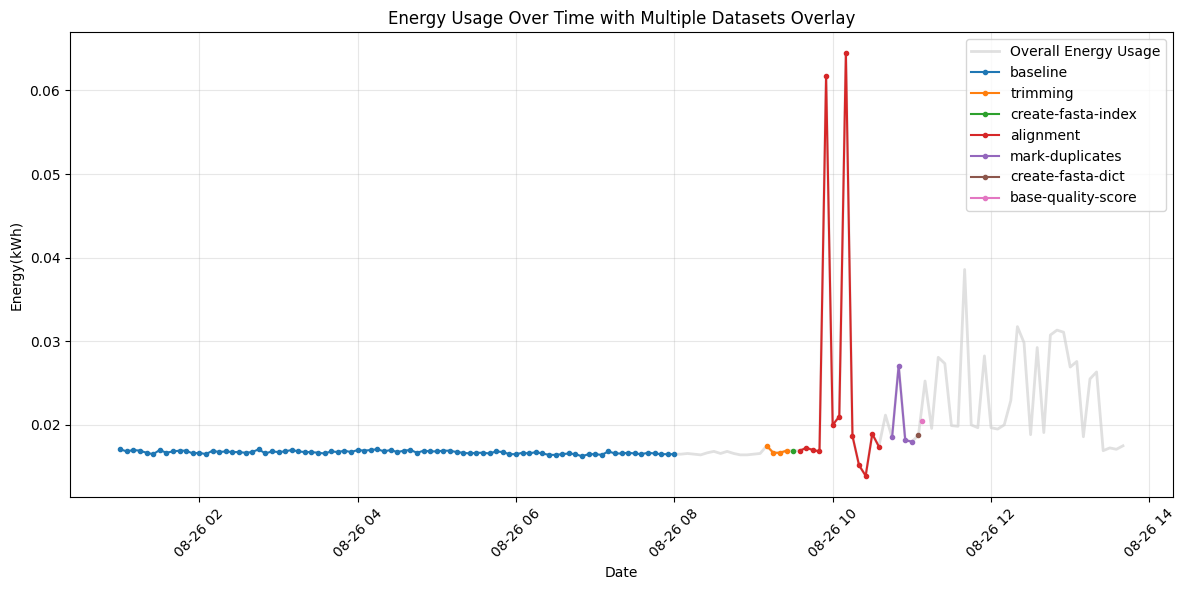

In [11]:
plot_energy_usage_overlay_multiple_datasets(power_data, power_data_segments, time_periods, start_time, end_time)

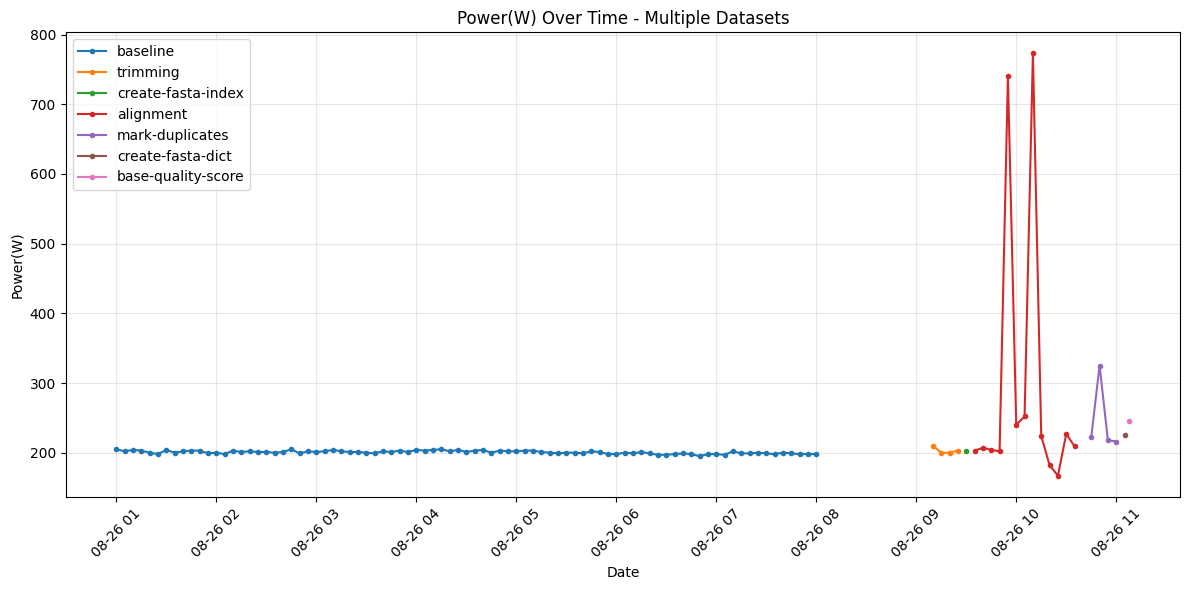

In [12]:
plot_multiple_datasets(power_data_segments, time_periods)

The BSQR step is not in the plot becaus there is no datapoint for it in the tapo power data.

However, we do attribute a contribution to it here, in the power_data_segments, which is the fractional contribution of the data point after the BSQR step.

This is coded/computed in the function divide_power_data_into_step_periods(). 

# Compute the total energy of the pipeline for the Tapo power data and compare with the carbontracker data
To compute the total energy of the pipeline for the Tapo data, we compute the average energy for the baseline and subtract this value from each energy value in the dataset, then compute the sum of the energy in the pipeline duration.

In [13]:
def compute_relative_energy_usage(power_data_segments, time_periods):
    """
    Compute the relative energy usage for each segment.

    Parameters:
    power_data_segments (list): List of power data segments

    Returns:
    pd.DataFrame: DataFrame with relative energy usage
    """
    total_energy = 0
    baseline_segment = power_data_segments[0] # assume that this corresponds to the baseline
    baseline_energy = baseline_segment['Energy(kWh)'].mean()
    segment_nr = 0
    outdf = pd.DataFrame(columns=["step", "start", "stop", "duration", "energy(kWh)"])
    for segment in power_data_segments[1:]:
        segment_nr += 1
        if not segment.empty:
            relative_energy = segment['Energy(kWh)'] - baseline_energy
            segment_energy = relative_energy.sum()
            total_energy += segment_energy
            step = time_periods[segment_nr][0]
            start = time_periods[segment_nr][1]
            stop = time_periods[segment_nr][2]
            duration = (pd.to_datetime(stop) - pd.to_datetime(start)).total_seconds()
            new_row = pd.DataFrame([{"step": step, "start": start, "stop": stop, "duration": duration, "energy(kWh)": segment_energy}])
            outdf = pd.concat([outdf, new_row], ignore_index=True)
        else:
            print(f"Warning! Empty segment {segment_nr}")
    print(f"Total energy consumption (kWh): {total_energy}")
    return outdf

In [14]:
compute_relative_energy_usage(power_data_segments, time_periods)

Total energy consumption (kWh): 0.1233410130718953


/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_9309/1437016408.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, new_row], ignore_index=True)


,step,start,stop,duration,energy(kWh)
0,trimming,2025-08-26 09:09:44,2025-08-26 09:29:00,1156.0,0.000848
1,create-fasta-index,2025-08-26 09:29:10,2025-08-26 09:30:06,56.0,0.000191
2,alignment,2025-08-26 09:30:16,2025-08-26 10:39:59,4183.0,0.101735
3,mark-duplicates,2025-08-26 10:40:09,2025-08-26 11:04:28,1459.0,0.014848
4,create-fasta-dict,2025-08-26 11:04:38,2025-08-26 11:05:32,54.0,0.002025
5,base-quality-score,2025-08-26 11:05:42,2025-08-26 11:07:52,130.0,0.003694


In [15]:
ctd_c6_r1["energy"].sum()

np.float64(0.28121999999999997)

In [16]:
ctd_c6_r1

,step,start,stop,duration,co2,energy,status,output
0,trimming,2025-08-26T09:09:44Z,2025-08-26T09:29:00Z,1156,1.219,0.040536,Succeeded,trimming-results*
1,create-fasta-index,2025-08-26T09:29:10Z,2025-08-26T09:30:06Z,56,0.003,0.000086,Succeeded,fasta-index*
2,alignment,2025-08-26T09:30:16Z,2025-08-26T10:39:59Z,4183,6.607,0.219638,Succeeded,alignment-results*
3,mark-duplicates,2025-08-26T10:40:09Z,2025-08-26T11:04:28Z,1459,0.619,0.020589,Succeeded,mark-duplicates-results*
4,create-fasta-dict,2025-08-26T11:04:38Z,2025-08-26T11:05:32Z,54,0.006,0.000196,Succeeded,fasta-dict*
5,base-quality-score,2025-08-26T11:05:42Z,2025-08-26T11:07:52Z,130,0.005,0.000175,Succeeded,final-results*
